# Exercise 1: Exploring Class Separability in 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng(42)

In [3]:
means = np.array([
    [2.0, 3.0],   # Class 0
    [5.0, 6.0],   # Class 1
    [8.0, 1.0],   # Class 2
    [15.0, 4.0],  # Class 3
])

stds = np.array([
    [0.8, 2.5],   # Class 0
    [1.2, 1.9],   # Class 1
    [0.9, 0.9],   # Class 2
    [0.5, 2.0],   # Class 3
])

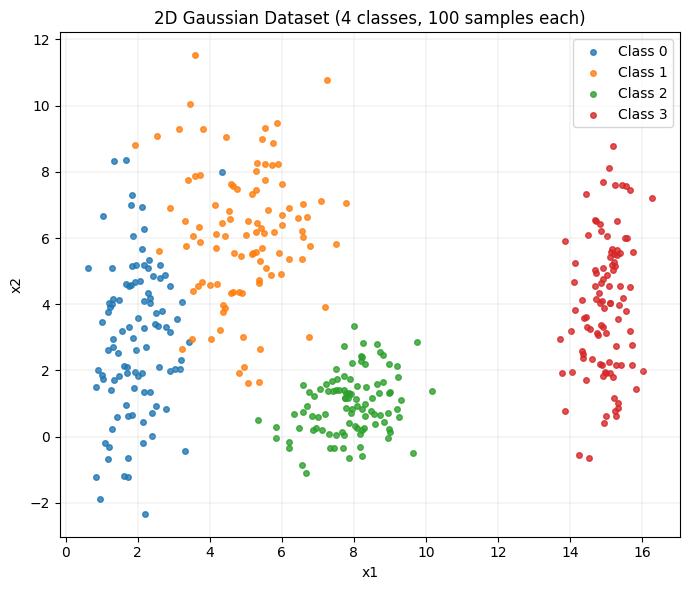

In [4]:
n_per_class = 100
n_classes = 4

Xs = []
ys = []
for c in range(n_classes):
    cov = np.diag(stds[c]**2)
    Xc = rng.multivariate_normal(mean=means[c], cov=cov, size=n_per_class)
    Xs.append(Xc)
    ys.append(np.full(n_per_class, c))

X = np.vstack(Xs)
y = np.concatenate(ys)

plt.figure(figsize=(7, 6))
for c in range(n_classes):
    cls_pts = X[y == c]
    plt.scatter(cls_pts[:, 0], cls_pts[:, 1], s=16, label=f"Class {c}", alpha=0.8)
plt.title("2D Gaussian Dataset (4 classes, 100 samples each)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True, linewidth=0.3, alpha=0.6)
plt.tight_layout()
plt.show()

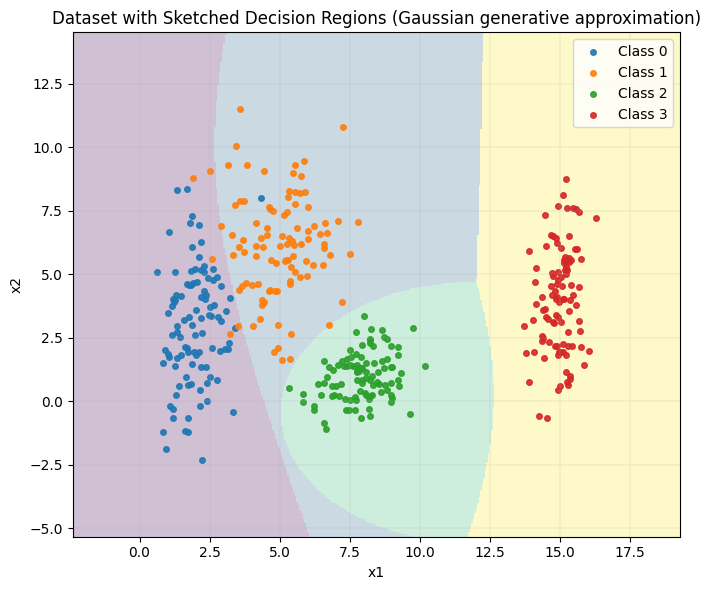

In [6]:
def log_gaussian_diag(x, mean, std):
    var = std**2
    diff = x - mean
    return -0.5 * (np.sum((diff**2) / var, axis=1) + np.sum(np.log(2*np.pi*var)))

pad = 3.0
xmin, ymin = X.min(axis=0) - pad
xmax, ymax = X.max(axis=0) + pad

xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, 400),
    np.linspace(ymin, ymax, 400)
)
grid = np.c_[xx.ravel(), yy.ravel()]

loglik = np.zeros((grid.shape[0], n_classes))
for c in range(n_classes):
    loglik[:, c] = log_gaussian_diag(grid, means[c], stds[c])

pred = np.argmax(loglik, axis=1)
Z = pred.reshape(xx.shape)

plt.figure(figsize=(7, 6))

plt.imshow(Z, origin="lower",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.25, interpolation="nearest", aspect="auto")
for c in range(n_classes):
    cls_pts = X[y == c]
    plt.scatter(cls_pts[:, 0], cls_pts[:, 1], s=16, label=f"Class {c}", alpha=0.9)
plt.title("Dataset with Sketched Decision Regions (Gaussian generative approximation)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True, linewidth=0.3, alpha=0.6)
plt.tight_layout()
plt.show()

# Explanation
### Distribuição/overlap

- Classe 0 (~x≈2, y≈3) é mais estreita em x e bem espalhada em y (desvio 2.5). Ela encosta na Classe 1 no eixo x.

- Classe 1 (~x≈5, y≈6) é mais alta (y grande) e também relativamente espalhada; há sobreposição moderada com a Classe 0 na faixa x≈3–4, sobretudo para y entre ~3 e ~6.

- Classe 2 (~x≈8, y≈1) é um blob mais compacto; fica bem separada em y da Classe 1 e um pouco distante em x da Classe 0.

- Classe 3 (~x≈15, y≈4) está bastante separada em x das demais; mesmo com variância grande em y, raramente invade as outras.

### Linear separability?

- Um único hiperplano (reta) não separa as quatro classes ao mesmo tempo. Até dá para separar blocos (ex.: {0,1,2} vs {3}) com uma reta vertical, mas 0 vs 1 exigem cortes adicionais.

- Um classificador linear multiclasse (one‑vs‑rest ou softmax linear) produziria fronteiras lineares entre pares, mas aqui as covariâncias diferentes sugerem fronteiras curvas (melhor capturadas por um modelo não linear ou por um gerador Gaussiano/QDA).

### Esboço das fronteiras

- No segundo gráfico, apresenta o fundo com as regiões previstas por um classificador Gaussiano (usando as médias e desvios fornecidos, priors iguais).

- As fronteiras entre classes aparecem como curvas suaves (efeito das variâncias diferentes), algo parecido com o que uma rede neural com algumas camadas poderia aprender (ReLU + camadas suficientes aproximam bem essas superfícies).